In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

EPOCHS = 20
BATCH_SIZE = 100
prediction_accuracy = {}
# Load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def create_model_and_train(
    test_variant: str,
    hidden_nodes: int = 512,
    num_hidden_layers: int = 1,   # NEW: number of hidden layers
    learning_rate: float = 0.5,
    batch_size: int = BATCH_SIZE,
    epochs: int = EPOCHS,
    verbose: int = 0
) -> tuple:
    layers = [tf.keras.layers.Input(shape=(784,))]
    # Add hidden layers dynamically
    for _ in range(num_hidden_layers):
        layers.append(tf.keras.layers.Dense(hidden_nodes, activation="relu"))
    # Output layer
    layers.append(tf.keras.layers.Dense(10))  # logits
    model = tf.keras.Sequential(layers)

    # Loss and optimizer
    loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    # Compile model
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

    # Training
    model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test, y_test),
        verbose=verbose
    )

    # Evaluate
    _, test_acc = model.evaluate(x_test, y_test, verbose=verbose)
    if not "default" in test_variant:
        prediction_accuracy[test_variant] = test_acc
    else:
        print(f"Final Test Accuracy: {test_acc:.4f}")
    return model, x_test, y_test


def show_misclassified_images(model: tf.keras.Model, x_test: np.ndarray, y_test: np.ndarray):
    # Get predictions
    preds = model.predict(x_test, verbose=0)
    preds = tf.argmax(preds, axis=1)
    y_true = tf.argmax(y_test, axis=1)

    # Find misclassified indices
    misclassified = tf.where(preds != y_true).numpy().flatten()
    print(f"Number of misclassified samples: {len(misclassified)}")

    # Plot first 25 misclassified samples
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(misclassified[:25]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
        plt.title(f"T:{y_true[idx].numpy()} P:{preds[idx].numpy()}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


2025-08-24 09:25:50.867709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


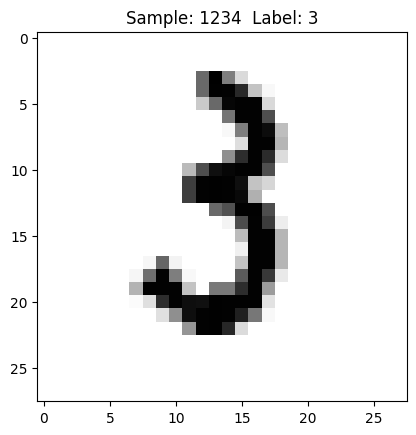

In [2]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label
    print(y_train[num]) 
    #Print the label converted back to a number
    label = y_train[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = x_train[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(1234)

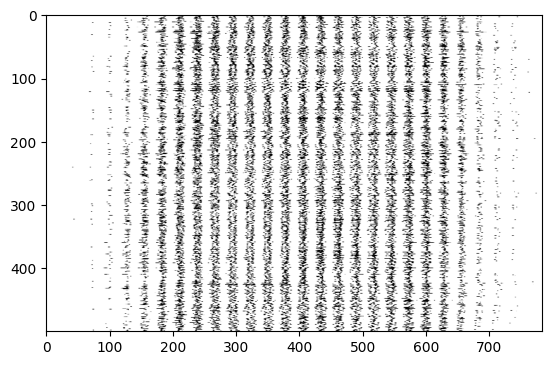

In [3]:
import numpy as np

images = x_train[0].reshape([1,784])
for i in range(1, 500):
    images = np.concatenate((images, x_train[i].reshape([1,784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [4]:
# Build model & train, Default
model, x_test, y_test = create_model_and_train(test_variant="default", verbose=2)

Epoch 1/20
600/600 - 3s - 5ms/step - accuracy: 0.9236 - loss: 0.2557 - val_accuracy: 0.9645 - val_loss: 0.1207
Epoch 2/20
600/600 - 2s - 4ms/step - accuracy: 0.9698 - loss: 0.1013 - val_accuracy: 0.9731 - val_loss: 0.0884
Epoch 3/20
600/600 - 2s - 3ms/step - accuracy: 0.9797 - loss: 0.0693 - val_accuracy: 0.9712 - val_loss: 0.0887
Epoch 4/20
600/600 - 2s - 4ms/step - accuracy: 0.9847 - loss: 0.0517 - val_accuracy: 0.9793 - val_loss: 0.0670
Epoch 5/20
600/600 - 2s - 3ms/step - accuracy: 0.9891 - loss: 0.0387 - val_accuracy: 0.9792 - val_loss: 0.0653
Epoch 6/20
600/600 - 2s - 4ms/step - accuracy: 0.9918 - loss: 0.0305 - val_accuracy: 0.9798 - val_loss: 0.0641
Epoch 7/20
600/600 - 3s - 5ms/step - accuracy: 0.9938 - loss: 0.0236 - val_accuracy: 0.9820 - val_loss: 0.0566
Epoch 8/20
600/600 - 3s - 5ms/step - accuracy: 0.9959 - loss: 0.0181 - val_accuracy: 0.9813 - val_loss: 0.0583
Epoch 9/20
600/600 - 4s - 6ms/step - accuracy: 0.9973 - loss: 0.0139 - val_accuracy: 0.9808 - val_loss: 0.0584
E

Number of misclassified samples: 160


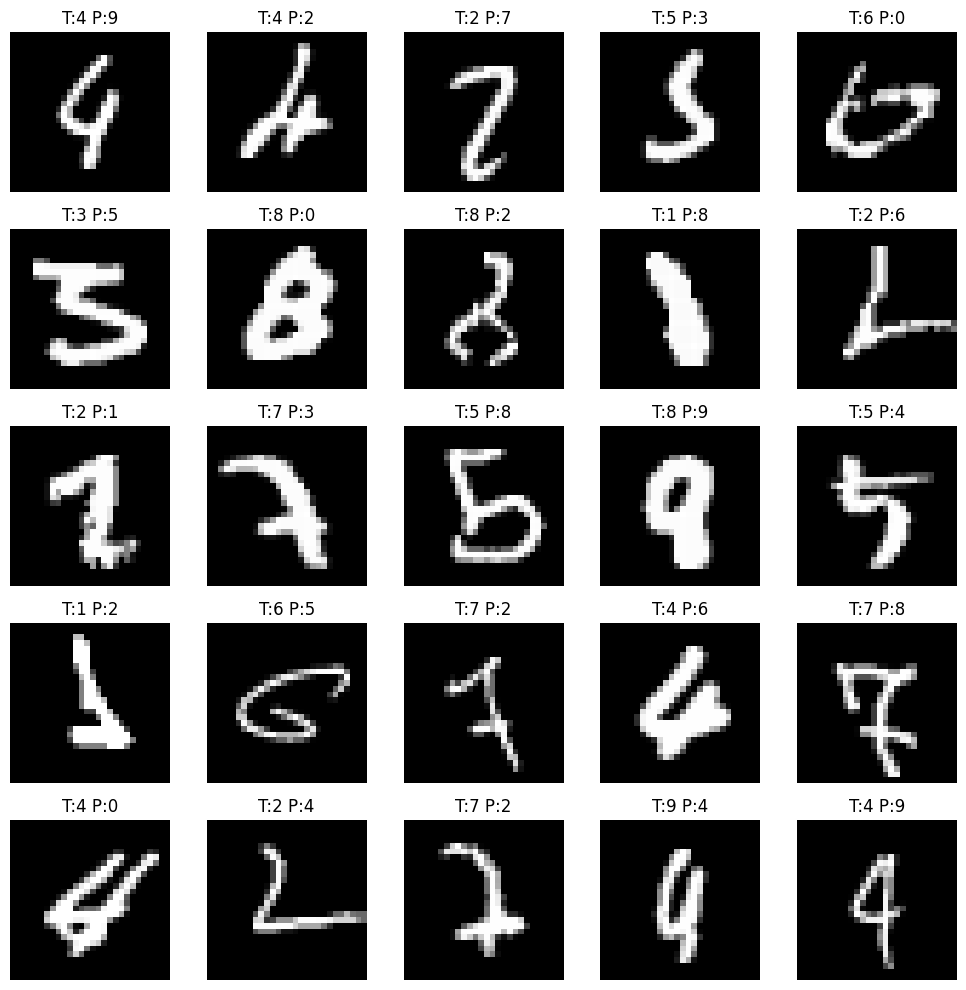

In [5]:
show_misclassified_images(model, x_test, y_test)

In [6]:
# Build model & train hidden node variants
hidden_node_variants = [256, 512, 1024]
for nodes in hidden_node_variants:
    variant_name = f"hidden_{nodes}"
    model, x_test, y_test = create_model_and_train(test_variant=variant_name, hidden_nodes=nodes)
print(f"Prediction accuracy for different hidden node variants:")
for variant, accuracy in prediction_accuracy.items():
    print(f" - {variant}: {accuracy:.4f}")

Prediction accuracy for different hidden node variants:
 - hidden_256: 0.9821
 - hidden_512: 0.9827
 - hidden_1024: 0.9847


In [7]:
# Build model & train learning rate variants
learning_rate_variants = [0.005, 0.05, 0.5, 1.0]
for lr in learning_rate_variants:
    variant_name = f"lr_{lr}"
    model, x_test, y_test = create_model_and_train(test_variant=variant_name, learning_rate=lr)
print(f"Prediction accuracy for different learning rate variants:")
for variant, accuracy in prediction_accuracy.items():
    print(f" - {variant}: {accuracy:.4f}")

Prediction accuracy for different learning rate variants:
 - hidden_256: 0.9821
 - hidden_512: 0.9827
 - hidden_1024: 0.9847
 - lr_0.005: 0.9314
 - lr_0.05: 0.9757
 - lr_0.5: 0.9831
 - lr_1.0: 0.9841


In [8]:
# Build model & train number of hidden layers variants
num_hidden_layers_variants = [1, 2, 3]
for num_layers in num_hidden_layers_variants:
    variant_name = f"num_layers_{num_layers}"
    model, x_test, y_test = create_model_and_train(test_variant=variant_name, num_hidden_layers=num_layers)
print(f"Prediction accuracy for different number of hidden layers variants:")
for variant, accuracy in prediction_accuracy.items():
    print(f" - {variant}: {accuracy:.4f}")

Prediction accuracy for different number of hidden layers variants:
 - hidden_256: 0.9821
 - hidden_512: 0.9827
 - hidden_1024: 0.9847
 - lr_0.005: 0.9314
 - lr_0.05: 0.9757
 - lr_0.5: 0.9831
 - lr_1.0: 0.9841
 - num_layers_1: 0.9844
 - num_layers_2: 0.9857
 - num_layers_3: 0.9860


In [9]:
# Build model & train number of batch size variants
batch_size_variants = [32, 64, 128, 256]
for batch_size in batch_size_variants:
    variant_name = f"batch_size_{batch_size}"
    model, x_test, y_test = create_model_and_train(test_variant=variant_name, batch_size=batch_size)
print(f"Prediction accuracy for different batch size variants:")
for variant, accuracy in prediction_accuracy.items():
    print(f" - {variant}: {accuracy:.4f}")

Prediction accuracy for different batch size variants:
 - hidden_256: 0.9821
 - hidden_512: 0.9827
 - hidden_1024: 0.9847
 - lr_0.005: 0.9314
 - lr_0.05: 0.9757
 - lr_0.5: 0.9831
 - lr_1.0: 0.9841
 - num_layers_1: 0.9844
 - num_layers_2: 0.9857
 - num_layers_3: 0.9860
 - batch_size_32: 0.9853
 - batch_size_64: 0.9834
 - batch_size_128: 0.9825
 - batch_size_256: 0.9806


In [11]:
#train with best hyperparameters
model, x_test, y_test = create_model_and_train(
    test_variant="best",
    hidden_nodes=1024,
    num_hidden_layers=3,
    learning_rate=1.0,
    batch_size=32,
)


In [12]:
print(prediction_accuracy['best'])

0.09799999743700027
